In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix

In [26]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
FLATTENED_IMG_DIM = IMG_HEIGHT * IMG_WIDTH
TRAIN_IMGS_COUNT = 60000
TEST_IMGS_COUNT = 10000

CLASS_LABELS =  ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [27]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [28]:
X_train = x_train.reshape(60000, 28, 28, 1)
X_test = x_test.reshape(10000, 28, 28, 1)

In [29]:
X_train = X_train/255.0
X_test = X_test/255.0

In [56]:
# Model 1

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Flatten())
cnn1.add(Dropout(0.5))
cnn1.add(Dense(256, activation='relu', name='layer_1'))
cnn1.add(Dense(128, activation='relu', name='layer_2'))
cnn1.add(Dense(64, activation='relu', name='layer_3'))
cnn1.add(Dense(10, activation='softmax', name='output'))

cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [58]:
%%time

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = cnn1.fit(x=X_train, y=y_train, batch_size=100, epochs=80, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/80
540/540 [==============================] - 11s 21ms/step - loss: 0.5906 - accuracy: 0.7810 - val_loss: 0.3836 - val_accuracy: 0.8573
Epoch 2/80
540/540 [==============================] - 10s 18ms/step - loss: 0.3849 - accuracy: 0.8589 - val_loss: 0.3193 - val_accuracy: 0.8847
Epoch 3/80
540/540 [==============================] - 10s 19ms/step - loss: 0.3341 - accuracy: 0.8767 - val_loss: 0.2880 - val_accuracy: 0.8943
Epoch 4/80
540/540 [==============================] - 10s 19ms/step - loss: 0.3045 - accuracy: 0.8867 - val_loss: 0.2872 - val_accuracy: 0.8952
Epoch 5/80
540/540 [==============================] - 10s 19ms/step - loss: 0.2829 - accuracy: 0.8944 - val_loss: 0.2608 - val_accuracy: 0.9045
Epoch 6/80
540/540 [==============================] - 10s 19ms/step - loss: 0.2666 - accuracy: 0.9000 - val_loss: 0.2533 - val_accuracy: 0.9070
Epoch 7/80
540/540 [==============================] - 11s 20ms/step - loss: 0.2496 - accuracy: 0.9052 - val_loss: 0.2416 - val_accuracy:

### Evaluating Accuracy and Loss

In [61]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.23940172791481018
Test accuracy: 0.9111999869346619


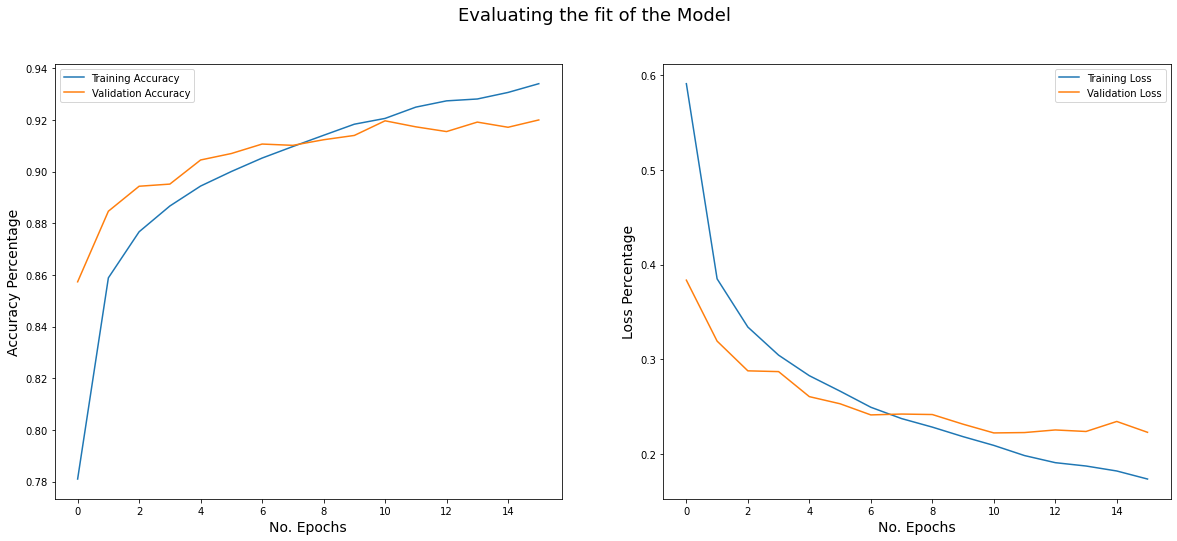

In [89]:
hist = history.history

hist_df = pd.DataFrame(hist)

loss_df = hist_df.loc[:, ['loss', 'val_loss']]
accuracy_df = hist_df.loc[:, ['accuracy', 'val_accuracy']]

plt.figure(figsize=[20,8])
plt.suptitle('Evaluating the fit of the Model', fontsize=18)

plt.subplot(1,2,1)
# fig_accu = accuracy_df.plot()
plt.plot(accuracy_df.accuracy, label='Training Accuracy')
plt.plot(accuracy_df.val_accuracy, label='Validation Accuracy')
plt.xlabel('No. Epochs', fontsize=14)
plt.ylabel('Accuracy Percentage', fontsize=14)
plt.legend()

plt.subplot(1,2,2)
#fig_loss = loss_df.plot()
plt.plot(loss_df.loss, label='Training Loss')
plt.plot(loss_df.val_loss, label='Validation Loss')
plt.xlabel('No. Epochs', fontsize=14)
plt.ylabel('Loss Percentage', fontsize=14)
plt.legend()

plt.show()

In [90]:
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy
11,0.198719,0.924963,0.222974,0.917333
12,0.191250,0.927389,0.225719,0.915500
13,0.187728,0.928111,0.224111,0.919167
14,0.182482,0.930648,0.234667,0.917167
15,0.174009,0.934037,0.223242,0.920000


In [66]:
confusion_matrix(y_test, np.argmax(cnn1.predict(X_test), axis=-1))

array([[870,   0,  15,  19,   2,   1,  83,   0,   9,   1],
       [  1, 978,   0,  16,   1,   0,   2,   0,   2,   0],
       [ 13,   1, 894,  10,  32,   0,  49,   0,   1,   0],
       [ 10,   4,   6, 950,   9,   0,  18,   0,   3,   0],
       [  1,   1,  76,  46, 823,   0,  53,   0,   0,   0],
       [  0,   0,   0,   0,   0, 984,   0,  10,   0,   6],
       [114,   0,  69,  25,  66,   0, 717,   0,   9,   0],
       [  0,   0,   0,   0,   0,  12,   0, 979,   0,   9],
       [  0,   1,   4,   3,   0,   3,   3,   4, 982,   0],
       [  1,   0,   0,   0,   0,   7,   0,  57,   0, 935]])

## Varying the Model Architecture

### Model - 2 : CNN

In [100]:
# Model 2

cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Flatten())
cnn2.add(Dropout(0.3))
cnn2.add(BatchNormalization())
cnn2.add(Dense(256, activation='relu', name='layer_1'))
cnn2.add(Dropout(0.3))
cnn2.add(BatchNormalization())
cnn2.add(Dense(128, activation='relu', name='layer_2'))
cnn2.add(Dropout(0.3))
cnn2.add(BatchNormalization())
cnn2.add(Dense(64, activation='relu', name='layer_3'))
cnn2.add(Dense(10, activation='softmax', name='output'))

cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [101]:
 %%time

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history2 = cnn2.fit(x=X_train, y=y_train, batch_size=100, epochs=80, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/80
540/540 [==============================] - 13s 24ms/step - loss: 0.5713 - accuracy: 0.7937 - val_loss: 0.3846 - val_accuracy: 0.8615
Epoch 2/80
540/540 [==============================] - 13s 23ms/step - loss: 0.3696 - accuracy: 0.8640 - val_loss: 0.2907 - val_accuracy: 0.8900
Epoch 3/80
540/540 [==============================] - 13s 24ms/step - loss: 0.3269 - accuracy: 0.8786 - val_loss: 0.2936 - val_accuracy: 0.8900
Epoch 4/80
540/540 [==============================] - 12s 22ms/step - loss: 0.2999 - accuracy: 0.8906 - val_loss: 0.2682 - val_accuracy: 0.8970
Epoch 5/80
540/540 [==============================] - 12s 22ms/step - loss: 0.2817 - accuracy: 0.8960 - val_loss: 0.2883 - val_accuracy: 0.8890
Epoch 6/80
540/540 [==============================] - 12s 22ms/step - loss: 0.2650 - accuracy: 0.9010 - val_loss: 0.2441 - val_accuracy: 0.9075
Epoch 7/80
540/540 [==============================] - 12s 22ms/step - loss: 0.2551 - accuracy: 0.9052 - val_loss: 0.2439 - val_accuracy:

In [103]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.23599301278591156
Test accuracy: 0.9121000170707703


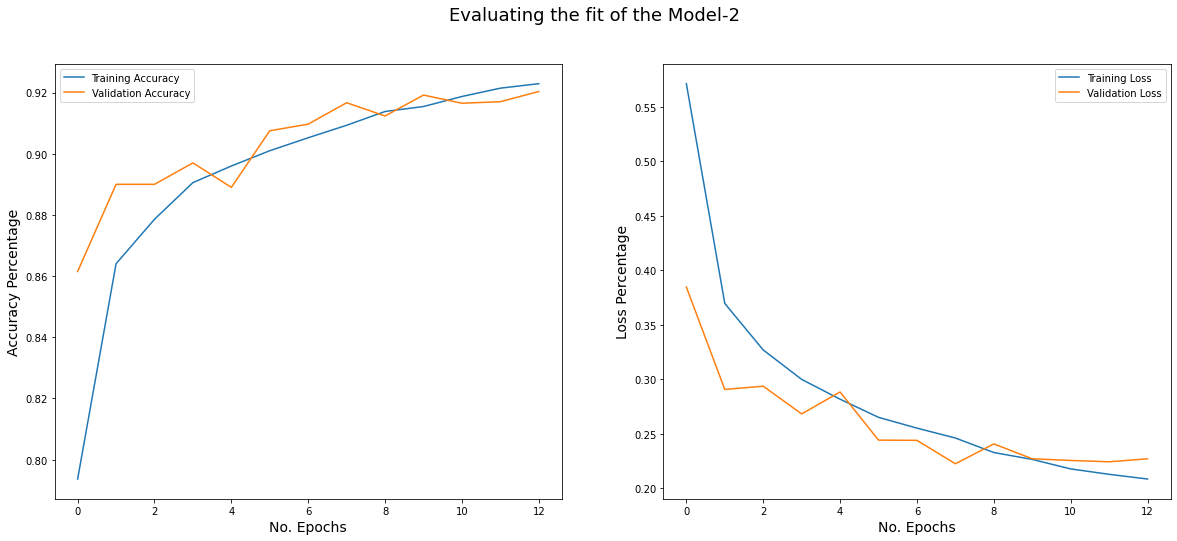

In [102]:
hist2 = history2.history
hist_df2 = pd.DataFrame(hist2)
loss_df2 = hist_df2.loc[:, ['loss', 'val_loss']]
accuracy_df2 = hist_df2.loc[:, ['accuracy', 'val_accuracy']]

plt.figure(figsize=[20,8])
plt.suptitle('Evaluating the fit of the Model-2', fontsize=18)

plt.subplot(1,2,1)
# fig_accu = accuracy_df.plot()
plt.plot(accuracy_df2.accuracy, label='Training Accuracy')
plt.plot(accuracy_df2.val_accuracy, label='Validation Accuracy')
plt.xlabel('No. Epochs', fontsize=14)
plt.ylabel('Accuracy Percentage', fontsize=14)
plt.legend()

plt.subplot(1,2,2)
#fig_loss = loss_df.plot()
plt.plot(loss_df2.loss, label='Training Loss')
plt.plot(loss_df2.val_loss, label='Validation Loss')
plt.xlabel('No. Epochs', fontsize=14)
plt.ylabel('Loss Percentage', fontsize=14)
plt.legend()

plt.show()

In [104]:
accuracy_df2.tail()

,accuracy,val_accuracy
8,0.913796,0.912333
9,0.915426,0.919167
10,0.918704,0.916500
11,0.921426,0.917000
12,0.922889,0.920333
